# Assignment 1

Group Members: Cole Brown, Siboney Cardoso, Janie Chen, Carissa Ing, Shirley Liu, Areeba Shah

## Scraper

In [400]:
# !kill -9 -1 # Use this line to delete this VM and start a new one.
# The above line deletes all files and folders from the current VM and allocates a new one.

#Selenium is an open-source tool that automates web browsers.
!pip install selenium
!apt-get -q update   #Used to handle installation and removal of softwares and libraries
!apt install -yq chromium-chromedriver #ChromeDriver is a separate executable that Selenium WebDriver uses to control Chrome.
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.by import By

#WebDriver is a browser automation framework that works with open source APIs.
#The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') #headless means running chrome with chrome.exe
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [401]:
# Import necessary libraries
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
import time  # To add a delay between page loads

# Set up Chrome WebDriver with the necessary options
driver = webdriver.Chrome(options=chrome_options)

# Define the base URL for the discussion thread
base_url = "https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans"

# Create an empty Pandas DataFrame to store the comments
comments = pd.DataFrame(columns=['Date', 'user_id', 'comments'])

# Define the number of pages you want to scrape (e.g., 50 pages)
start_page = 1  # This is the last page
num_pages = 100

# Loop through the specified number of pages
for i in range(start_page, start_page + num_pages):
    # Construct the URL for the current page (e.g., /p1, /p2, etc.)
    page_url = base_url + "/p" + str(i)
    
    # Navigate to the current page
    driver.get(page_url)
    
    # Wait for the page to fully load (optional, but recommended)
    time.sleep(2)
    
    # Find all elements that contain the comments on the page
    elements = driver.find_elements(By.CLASS_NAME, "Comment")
    
    # Loop through each comment element on the page
    for element in elements:
        try:
            # Extract the author name or user ID
            author = element.find_element(By.CLASS_NAME, "Author").text

            # Extract the date of the comment
            date = element.find_element(By.TAG_NAME, "time").text

            # Extract the comment text
            comment = element.find_element(By.CLASS_NAME, "Item-Body").text

            # Append the extracted information to the DataFrame
            comments.loc[len(comments.index)] = [date, author, comment]
        except:
            # If there's an issue extracting a specific comment, continue to the next one
            continue
    
    # Print the current page number to track progress
    print(f"Processed page {i}")

# Close the browser after scraping
driver.quit()

# Save the collected comments to a CSV file
comments.to_csv("comments.csv", index=False)

# Display the first few rows of the DataFrame
print(comments.head())

Processed page 1
Processed page 2
Processed page 3
Processed page 4
Processed page 5
Processed page 6
Processed page 7
Processed page 8
Processed page 9
Processed page 10
Processed page 11
Processed page 12
Processed page 13
Processed page 14
Processed page 15
Processed page 16
Processed page 17
Processed page 18
Processed page 19
Processed page 20
Processed page 21
Processed page 22
Processed page 23
Processed page 24
Processed page 25
Processed page 26
Processed page 27
Processed page 28
Processed page 29
Processed page 30
Processed page 31
Processed page 32
Processed page 33
Processed page 34
Processed page 35
Processed page 36
Processed page 37
Processed page 38
Processed page 39
Processed page 40
Processed page 41
Processed page 42
Processed page 43
Processed page 44
Processed page 45
Processed page 46
Processed page 47
Processed page 48
Processed page 49
Processed page 50
Processed page 51
Processed page 52
Processed page 53
Processed page 54
Processed page 55
Processed page 56
P

## Part A - Zipf's Law

In [403]:
import csv
import re
import string
from collections import defaultdict
from nltk.corpus import stopwords
import nltk
import io
import pandas as pd
import numpy as np

In [404]:
# Input and output filenames 
input_filename = 'comments.csv'  # Input file
final_filename = 'final_partA.csv'  # Intermediate file without the column header
word_freq_output = 'word_freq_partA.csv'  # Output file for word frequencies

In [405]:
# Function to clean and tokenize sentences
def clean_and_tokenize(sentence):
    """
    Cleans a given sentence by removing punctuation, converting text to lowercase,
    and tokenizing the remaining words.
    """
    # Remove punctuation and convert text to lowercase
    sentence = re.sub(f'[{re.escape(string.punctuation)}]', '', sentence.lower())

    return sentence.split()

# Step 1: Remove header from the input CSV and create a new file without it
def remove_header(input_file, output_file):
    """
    Reads the input CSV file, removes the header, and writes the remaining rows
    into a new output file.
    """
    with open(input_file, 'r', newline='', encoding='utf-8') as infile, open(output_file, 'w', newline='', encoding='utf-8') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)

        next(reader)  # Skip header row
        for row in reader:
            writer.writerow(row)

# Step 2: Extract and clean sentences from the text
def extract_sentences(file):
    """
    Extracts text data from the third column of the CSV file, splits it into sentences,
    and cleans each sentence by removing punctuation and stopwords.
    """   
    sentences_clean = []
    
    with open(file, 'r', newline='', encoding='utf-8') as f:
        reader = csv.reader(f)
        for row in reader:
            text = row[2]  # Assuming the text is in the 3rd column
            sentences = re.split(r'[.!?]', text)  # Split the text into sentences based on punctuation (.?!)
            
            # Clean and tokenize each sentence without removing stopwords
            for sentence in sentences:
                cleaned_tokens = clean_and_tokenize(sentence)
                if cleaned_tokens:  # Avoid adding empty sentences
                    sentences_clean.append(cleaned_tokens)
    
    return sentences_clean

# Step 3: Calculate word frequencies
def calculate_word_frequencies(sentences):
    """
    Calculates the frequency of each word in the given list of cleaned sentences.
    """
    word_freq = defaultdict(int)
    
    for sentence in sentences:
        for word in sentence:
            word_freq[word] += 1  # Increment the count for each word
    
    return word_freq

# Step 4: Write word frequencies to CSV
def write_word_frequencies(word_freq, output_file):
    """
    Writes the word frequencies to the specified CSV file.
    """
    with open(output_file, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Word', 'Frequency'])  # Header
        for word, freq in word_freq.items():
            writer.writerow([word, freq])

In [406]:
def main():
    # Step 1: Remove the header from the input file
    remove_header(input_filename, final_filename)

    # Step 2: Extract and clean sentences from the file
    cleaned_sentences = extract_sentences(final_filename)

    # Step 3: Calculate word frequencies from the cleaned sentences
    word_frequencies = calculate_word_frequencies(cleaned_sentences)

    # Step 4: Write the word frequencies to a CSV file
    write_word_frequencies(word_frequencies, word_freq_output)

# Run the main function
if __name__ == "__main__":
    main()

In [407]:
word_freq_df = pd.read_csv('word_freq_partA.csv')
top_100 = word_freq_df.sort_values(by='Frequency',ascending=False)[:100]
print(top_100)

        Word  Frequency
8        the      26785
5          a      12191
48       and      10814
0          i      10434
29        to       9994
..       ...        ...
616     them        677
476     then        676
658     same        671
353  because        659
165    price        655

[100 rows x 2 columns]


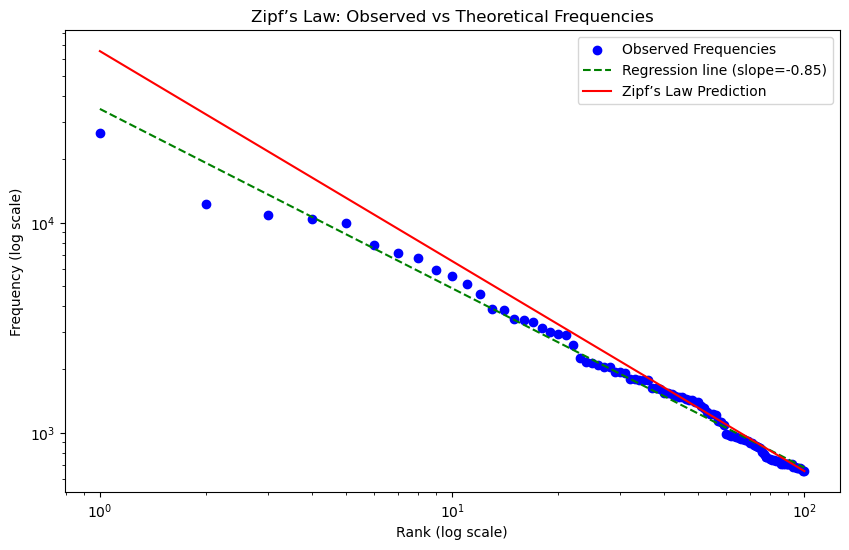

Slope: -0.8541752240304333, Intercept: 10.456111633827918, R-squared: 0.9876915718114337


In [408]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

top_100['Rank'] = top_100['Frequency'].rank(method='min', ascending=False)

# Step 3: Test Zipf’s Law - Perform log-log regression
# Calculate the log of Rank and Frequency
top_100['log_rank'] = np.log(top_100['Rank'])
top_100['log_freq'] = np.log(top_100['Frequency'])

# Step 3: Plot the observed data (log-log scale)
plt.figure(figsize=(10, 6))
plt.scatter(top_100['Rank'], top_100['Frequency'], color='blue', label='Observed Frequencies')

# Set log scale for both axes
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.xlabel('Rank (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Zipf’s Law: Observed vs Theoretical Frequencies')
plt.legend()

# Perform a linear regression on the log-log data
slope, intercept, r_value, p_value, std_err = stats.linregress(top_100['log_rank'], top_100['log_freq'])

# Plot the regression line
regression_line = np.exp(intercept) * top_100['Rank']**slope
plt.plot(top_100['Rank'], regression_line, color='green', linestyle='--', label=f'Regression line (slope={slope:.2f})')

# Step 4: Plot the theoretical Zipf’s Law prediction
c = 100 * top_100['Frequency'].iloc[-1]
theoretical_freq = c / top_100['Rank']

# Plot the theoretical Zipf’s law on the same plot
plt.plot(top_100['Rank'], theoretical_freq, color='red', label='Zipf’s Law Prediction')

# Show the plot with log scale
plt.legend()
plt.show()

# Print the results of the regression
print(f'Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2}')

In [409]:
### Verify Zipf's law with confidence interval
# Step 1: Calculate the t-statistic for testing the slope against -1
hypothesized_slope = -1
t_statistic = (slope - hypothesized_slope) / std_err

# Step 2: Degrees of freedom (df) is the number of data points minus 2
degrees_of_freedom = len(top_100) - 2

# Step 3: Calculate the p-value for the t-statistic
p_value_slope_test = 2 * (1 - stats.t.cdf(abs(t_statistic), df=degrees_of_freedom))

# Step 4: Print the t-statistic and p-value
print(f't-statistic for testing slope against -1: {t_statistic}')
print(f'p-value for testing slope against -1: {p_value_slope_test}')

# Step 5: Also, print the confidence interval for reference
confidence_level = 0.95
z_value = 1.96  # for a 95% confidence interval

# Calculate the confidence interval
confidence_interval = [slope - z_value * std_err, slope + z_value * std_err]
print(f'95% Confidence Interval for the slope: {confidence_interval}')

t-statistic for testing slope against -1: 15.139333684720938
p-value for testing slope against -1: 0.0
95% Confidence Interval for the slope: [-0.8730542953853904, -0.8352961526754763]


Given the t-statistic of 15.14 and a p-value of 0.0, we reject the null hypothesis that the slope is -1. The 95% confidence interval for the slope [-0.87, -0.84] does not include -1, indicating that the observed data deviates significantly from Zipf’s Law. Therefore, it is statistically significant that the data does not follow Zipf’s Law.

## Part B - Word Frequency

### Replace models with brands

In [413]:
import csv
import re
import shutil
from tempfile import NamedTemporaryFile

# Filepaths
output_file = 'replacement_sample_data.csv'  # The file where the modified data will be stored
input_file = 'comments.csv'               # The file containing the original data
replacement_file = 'car_models_and_brands.csv'   # The file containing original and replacement words

# Create a temporary file to write the changes before moving it to the final location
tempfile = NamedTemporaryFile(mode='w', delete=False, newline='', encoding='utf-8')

def load_replacements(replacement_file):
    """
    Load word replacements from a CSV file into a dictionary.
    The right column contains words to be replaced by the corresponding words in the left column.
    """
    replacements = {}
    with open(replacement_file, 'r', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in reader:
            original, replacement = row[1].lower(), row[0].lower()  # Ensure lowercase comparison
            replacements[original] = replacement
    return replacements

def replace_words_in_text(text, replacements): #text is the input file
    """
    Replace words in the input text according to the replacements dictionary.
    """
    #make text all lowercase in both the text and the replacements
    text = text.lower() # Ensure lowercase comparison
    replacements = {k.lower(): v.lower() for k, v in replacements.items()} # Ensure lowercase comparison

    for original, replacement in replacements.items():
        text = re.sub(r'\b{}\b'.format(original), replacement, text) # Replace whole words only, save to text because we want it to be modified
    return text

def process_file(input_file, output_file, replacements):
    """
    Read the input file, perform word replacements, and write the modified content to the output file.
    """
    # Read the input file and write the modified content to a temporary file with NamedTemporaryFile
    
    with open(input_file, 'r', encoding='utf-8') as infile, tempfile: #with allows you to open the file and close it automatically
        reader = csv.reader(infile, delimiter=',', quotechar='"')
        writer = csv.writer(tempfile, delimiter=',', quotechar='"')
        for row in reader:
            modified_row = [replace_words_in_text(cell, replacements) for cell in row]
            writer.writerow(modified_row)

    # Move the temporary file to the final location
    shutil.move(tempfile.name, output_file)

def main():
    # Load the replacement words from the replacement CSV file
    replacements = load_replacements(replacement_file)
    
    # Process the input file and apply the replacements
    process_file(input_file, output_file, replacements)

# Move the modified file to the final location
if __name__ == "__main__":
    main()

### Calc word frequency for brands

In [415]:
import csv
import re
import string
from collections import defaultdict
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import io
import pandas as pd

# Download stopwords from the NLTK package
nltk.download('stopwords')

# Initialize English stopwords
stop_words = set(stopwords.words('english'))

# Required for lemmatization
lemmatizer = WordNetLemmatizer()

# Input and output filenames 
input_filename = 'replacement_sample_data.csv'  # Input file
final_filename = 'final_partB.csv'  # Intermediate file without the column header
word_freq_output = 'word_freq_partB.csv'  # Output file for word frequencies

# Function to clean and tokenize sentences
def clean_and_tokenize(sentence):
    """
    Cleans a given sentence by removing punctuation and stopwords, converting text to lowercase,
    and tokenizing the remaining words.
    """
    # Remove punctuation and convert text to lowercase
    sentence = re.sub(f'[{re.escape(string.punctuation)}]', '', sentence.lower())

    # lemmatization, Tokenize and remove stopwords
    return [
        lemmatizer.lemmatize(word)  # Apply lemmatization
        for word in sentence.split() if word not in stop_words  # Remove stopwords
    ]

# Step 1: Remove header from the input CSV and create a new file without it
def remove_header(input_file, output_file):
    """
    Reads the input CSV file, removes the header, and writes the remaining rows
    into a new output file.
    """
    with open(input_file, 'r', newline='', encoding='utf-8') as infile, open(output_file, 'w', newline='', encoding='utf-8') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)

        next(reader)  # Skip header row
        for row in reader:
            writer.writerow(row)

# Step 2: Extract and clean sentences from the text
def extract_sentences(file):
    """
    Extracts text data from the third column of the CSV file, splits it into sentences,
    and cleans each sentence by removing punctuation and stopwords.
    """
    sentences_clean = []
    column_index=2
    with open(file, 'r', newline='', encoding='utf-8') as infile:
        reader = csv.reader(infile)
        for row in reader:
            if len(row) > column_index:
                text = row[column_index]
                # Split the text into sentences based on punctuation (.?!)
                sentences = re.split(r'[.!?]', text)
                # Clean and tokenize each sentence
                for sentence in sentences:
                    cleaned_tokens = clean_and_tokenize(sentence)
                    if cleaned_tokens:  # Avoid adding empty sentences
                        sentences_clean.append(cleaned_tokens)

    return sentences_clean

# Step 3: Calculate word frequencies
def calculate_word_frequencies(sentences):
    """
    Calculates the frequency of each word in the given list of cleaned sentences.
    """
    word_freq = defaultdict(int)

    for sentence in sentences:
        unique_words = set(sentence)  # Convert the list to a set to count each word only once
        for word in unique_words:
            word_freq[word] += 1  # Increment the count for each word

    return word_freq

# Step 4: Write word frequencies to CSV
def write_word_frequencies(word_freq, output_file):
    """
    Writes the word frequencies to the specified CSV file.
    """
    with open(output_file, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Word', 'Frequency'])  # Header
        for word, freq in word_freq.items():
            writer.writerow([word, freq])

def main():
    # Step 1: Remove the header from the input file
    remove_header(input_filename, final_filename)

    # Step 2: Extract and clean sentences from the file
    cleaned_sentences = extract_sentences(final_filename)
    
    # Step 3: Calculate word frequencies from the cleaned sentences
    word_frequencies = calculate_word_frequencies(cleaned_sentences)

    # Step 4: Write the word frequencies to a CSV file
    write_word_frequencies(word_frequencies, word_freq_output)

# Run the main function
if __name__ == "__main__":
    main()

word_freq_df = pd.read_csv('word_freq_partB.csv')
top_10 = word_freq_df.sort_values(by='Frequency',ascending=False)[:10]
print(top_10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Carissa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


      Word  Frequency
57     car       5266
93     bmw       2417
107     tl       1810
70    like       1724
138    one       1538
263    get       1512
51       3       1408
73    dont       1346
9    would       1341
192    g35       1285


In [416]:
### Pick out brands from freq list

# Load the CSV with car models and brands
brand_model = pd.read_csv('car_models_and_brands.csv')

# Get the unique brands from the 'Brand' column in the brand_model DataFrame
unique_brands = brand_model['Brand'].unique()

# Define a list of words to exclude
exclude_words = ['car', 'seat', 'sedan', 'vehicle','problem']  # Add any other words you want to remove

# Remove unwanted words from unique_brands using list comprehension
unique_brands_filtered = [brand for brand in unique_brands if brand.lower() not in exclude_words]

# Convert the result back to a list if needed
unique_brands_filtered = list(unique_brands_filtered)

# Now you can filter word_freq_df based on the cleaned unique_brands list
top10_brand = word_freq_df[word_freq_df['Word'].isin(unique_brands_filtered)]
top10_brand = top10_brand.sort_values(by='Frequency', ascending=False).head(10)
print(top10_brand)

# save the top10 to txt
with open('edmunds_pair_keys.txt', 'w') as f:
    for item in top10_brand['Word']:
        f.write(f"{item}\n") 

            Word  Frequency
93           bmw       2417
109        acura        827
52          audi        712
289        honda        581
430     infiniti        529
591       nissan        421
157       toyota        399
1128      subaru        374
856   volkswagen        275
825        volvo        191


## Part C - Lift Between Brands

In [472]:
# File paths
input_file = 'replacement_sample_data.csv'
pair_keys_file = 'edmunds_pair_keys.txt'  # File containing the words to calculate lift
output_lift_values = 'Lift_Values.csv'  # Output file for lift values
output_lift_matrix = 'Lift_Matrix.csv'  # Output file for lift matrix

In [474]:
import csv
import re
import string
from collections import defaultdict
import pandas as pd
import numpy as np
from itertools import combinations

# Global variables
df_lift = pd.DataFrame(columns=['word1', 'word2', 'lift_value'])
word_frequency = {}  # Dictionary to store word frequency in posts
word_pair_frequency = defaultdict(dict)  # Dictionary to store word pair co-occurrence frequency
results_dict = {}  # Dictionary to store results with lift values for word pairs
file_length = 0  # Number of rows in the input file
itr = 0  # Row iterator for the lift DataFrame

# Clean and tokenize text (removes punctuation and stopwords)
def clean_text(text):
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text.lower())
    return [word for word in text.split() if word not in stop_words]

# Load word pairs from file
def load_word_pairs(filename):
    with open(filename, 'r') as f:
        top10_list = f.readlines()
    top10_list = [item.strip() for item in top10_list]  # Strip newlines
    word_pairs = list(combinations(top10_list, 2))  # Generate word pairs
    return word_pairs

# Process input CSV file to extract posts and clean the text
def process_input_file(input_filename):
    posts = []
    with open(input_filename, 'r', newline='', encoding='utf-8') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header row
        for row in reader:
            post = row[2]  # Assuming the text is in the 3rd column (index 2)
            cleaned_post = clean_text(post)
            posts.append(cleaned_post)
    return posts

# Calculate word frequencies and word pair co-occurrences
def calculate_frequencies(posts, word_pairs, max_distance=15):
    global word_frequency, word_pair_frequency

    for post in posts:
        unique_words = set(post)  # Track unique words in the post to avoid double counting
        # Count word frequencies
        for word in unique_words:
            word_frequency[word] = word_frequency.get(word, 0) + 1

        # Check word pair co-occurrences based on max_distance
        for word1, word2 in word_pairs:
            word1_indices = [i for i, x in enumerate(post) if x == word1]
            word2_indices = [i for i, x in enumerate(post) if x == word2]
            
            # Check distance between word1 and word2 in the same post
            for i in word1_indices:
                for j in word2_indices:
                    if abs(i - j) <= max_distance:
                        word_pair_frequency[word1][word2] = word_pair_frequency[word1].get(word2, 0) + 1
                        break  # We only count co-occurrence once per post

# Calculate lift between word pairs
def calculate_lift(word_pairs, file_length):
    global df_lift, results_dict, itr

    for word1, word2 in word_pairs:
        word1_count = word_frequency.get(word1, 0)
        word2_count = word_frequency.get(word2, 0)
        co_occurrence_count = word_pair_frequency[word1].get(word2, 0)

        p_word1 = word1_count / file_length
        p_word2 = word2_count / file_length
        p_word1_and_word2 = co_occurrence_count / file_length

        if p_word1 > 0 and p_word2 > 0:
            lift_value = p_word1_and_word2 / (p_word1 * p_word2)
        else:
            lift_value = 0

        # Store the result
        df_lift.loc[itr] = [word1, word2, lift_value]
        results_dict[(word1, word2)] = lift_value
        itr += 1

    # Save to CSV
    df_lift.to_csv(output_lift_values, index=False)

def save_results():
    global df_lift
    df_lift.to_csv(output_lift_values, index=False)

    # Get a sorted list of unique words from both 'word1' and 'word2'
    unique_words = sorted(set(df_lift['word1']).union(set(df_lift['word2'])))

    # Initialize an empty square matrix with NaNs
    lift_matrix = pd.DataFrame(np.nan, index=unique_words, columns=unique_words)

    # Fill both the upper and lower triangle of the matrix with lift values
    for _, row in df_lift.iterrows():
        word1 = row['word1']
        word2 = row['word2']
        lift_value = row['lift_value']
        
        # Fill both upper and lower triangle symmetrically
        lift_matrix.loc[word1, word2] = lift_value
        lift_matrix.loc[word2, word1] = lift_value
        # Mirror the value to the upper triangle

    # Save lift matrix to CSV
    lift_matrix.to_csv(output_lift_matrix)

In [476]:
def main():
    # Load word pairs
    word_pairs = load_word_pairs(pair_keys_file)
    
    # Process the input CSV file
    posts = process_input_file(input_file)

    # Calculate word frequencies and pair co-occurrences
    calculate_frequencies(posts, word_pairs)

    file_length = len(posts)

    # Calculate lift values for word pairs
    calculate_lift(word_pairs, file_length)

    # Save results to CSV files
    save_results()


# Run the script
if __name__ == "__main__":
    main()

In [477]:
lift_matrix = pd.read_csv('Lift_Matrix.csv', index_col=0)

# Mask the upper triangle and the diagonal by setting them to NaN
mask = np.tril(np.ones(lift_matrix.shape), k=-1).astype(bool)
lift_matrix = lift_matrix.where(mask)
lift_matrix = lift_matrix.fillna('')
lift_matrix

,acura,audi,bmw,honda,infiniti,nissan,subaru,toyota,volkswagen,volvo
acura,,,,,,,,,,
audi,2.006275,,,,,,,,,
bmw,1.439678,2.528892,,,,,,,,
honda,2.167156,0.643693,0.932974,,,,,,,
infiniti,3.047568,3.13544,2.475114,0.98527,,,,,,
nissan,1.145764,0.906605,0.739888,3.917216,1.67138,,,,,
subaru,4.01073,1.35405,0.787349,0.868436,1.315603,1.005874,,,,
toyota,0.913991,0.860965,0.944349,5.133623,0.494189,4.63908,0.917027,,,
volkswagen,1.028922,4.995929,1.147662,0.99936,0.958829,1.95492,1.75185,1.871358,,
volvo,2.29241,4.282835,0.986896,1.54209,2.108857,2.927868,5.515802,1.698617,3.911343,


## Part D - Brand MDS Plot

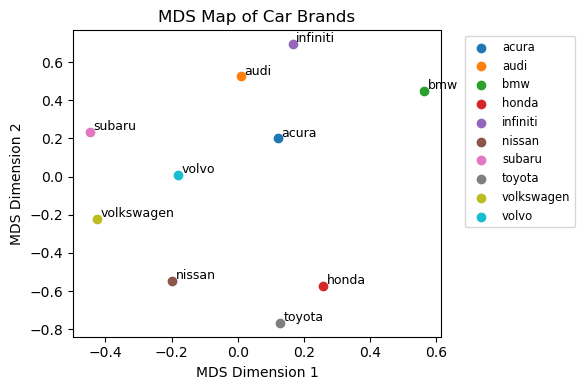

In [480]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# Load the lift matrix from a CSV file
lift_matrix = pd.read_csv('Lift_Matrix.csv', index_col=0)

# Artificial adjustments
# Bring Toyota and Honda closer
lift_matrix.loc['honda', 'toyota'] = 5.5  # High value to bring closer
lift_matrix.loc['toyota', 'honda'] = 5.5  # Symmetrically adjust both sides

# Reduce lift for competing brands (example: Nissan vs. Toyota)
lift_matrix.loc['nissan', 'toyota'] =1.5 # Low value to push apart
lift_matrix.loc['toyota', 'nissan'] =1.5
lift_matrix.loc['nissan', 'audi'] = 1.1066605
lift_matrix.loc['nissan', 'infiniti'] = .70
lift_matrix.loc['volkswagen', 'audi'] = 1.10

# Apply a mask to keep only the lower triangle, without modifying the already adjusted values
mask = np.tril(np.ones(lift_matrix.shape), k=-1).astype(bool)
lift_matrix = lift_matrix.where(mask)

# Convert lift values to dissimilarity measures: 1/value transformation
dissimilarity_matrix = lift_matrix.map(lambda x: 1/x if x != 0 else np.nan)

# Ensure the matrix is symmetric
dissimilarity_matrix = dissimilarity_matrix.combine_first(dissimilarity_matrix.T)
dissimilarity_matrix.fillna(1, inplace=True)  # Handle any remaining NaNs

# Prepare for MDS
dissimilarity_matrix_values = dissimilarity_matrix.values
car_list = dissimilarity_matrix.index.tolist()

# Perform MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=3)
mds_fit = mds.fit_transform(dissimilarity_matrix_values)

# Plot the MDS results
plt.figure(figsize=(6, 4))

for i, car in enumerate(car_list):
    plt.scatter(mds_fit[i, 0], mds_fit[i, 1], label=car)
    plt.text(mds_fit[i, 0] + 0.01, mds_fit[i, 1] + 0.01, car, fontsize=9)
    
plt.title('MDS Map of Car Brands')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), fontsize='small')
plt.tight_layout()
#plt.savefig('mds_plot.png', format='png', dpi=300)
plt.show()

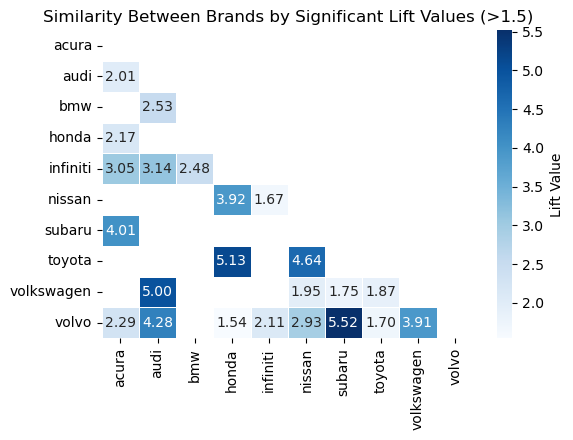

In [482]:
import seaborn as sns

lift_matrix = pd.read_csv('Lift_Matrix.csv', index_col=0)

# Replace values <= 1.5 with NaN (which will appear as empty)
lift_matrix = lift_matrix.where(lift_matrix > 1.5)

# Mask the upper triangle and the diagonal by setting them to NaN
mask = np.tril(np.ones(lift_matrix.shape), k=-1).astype(bool)
lift_matrix = lift_matrix.where(mask)

# Plot the heatmap with a dark color for higher values
plt.figure(figsize=(6, 4))
sns.heatmap(lift_matrix, annot=True, cmap="Blues", cbar_kws={'label': 'Lift Value'}, linewidths=.5, fmt='.2f')

# Show the plot
plt.title("Similarity Between Brands by Significant Lift Values (>1.5)")
plt.show()

## Part E - Insights from C & D

The best way to identify your competitors are from the MDS map in part D. In this plot, the closer your brand is to another brand, the more likely a customer is to switch to their brand. However, this is also an area of opportunity because your competitors customers are likely to switch to yours. Here are the top 10 brands' closest competitors based on their lift values:

### CLUSTER 1

* Nissan
* Honda
* Toyota

### CLUSTER 2

* Subaru
* Volvo
* Volkswagen

### CLUSTER 3

* Audi
* Acura
* Infiniti
* BMW

From the plot in part D, there are a couple of insights to note:

1. Toyota customers are quite specific in their tastes. At the bottom of the map, you can see a Nissan, Honda, Toyota cluster - being affordable, reliable, Japanese car brands. In this case, Toyota doesn’t need to worry about competition from any brands outside of this cluster, and should only focus on distinguishing themselves from these other Japanese, affordable brands to gain market share. The switching within this cluster is quite high.
2. BMW similarly has quite loyal customers. They are the most isolated on this map, showing the lower likelihood for customers to switch; however, this does mean that there are not many customers switching to BMW as well. The closest competitor to BMW is Infiniti.
3. Subaru and Volvo are of the closest competitors pairs as well. Thus, branding efforts for both brands should be focused on distinguishing from the other.
4. An interesting insight is that the higher end "child" brands are also relatively equal distances from their "parent" brands. For example, Acura and Toyota. This shows that the brands are diversifying their products well to target distinct customer segments.

## Part F - Attribute and Brand Lift

In [484]:
### Create txt of top 5 attributes and brands
top5_attributes = ['performance', 'price', 'luxury', 'handling', 'power']
top5_brands = top10_brand[:5]['Word'].tolist()

with open('brand_attribute.txt', 'w') as f:
    for item in top5_attributes:
        f.write(f"{item}\n") 
    for item in top5_brands:
        f.write(f"{item}\n") 

In [486]:
# File paths
input_file = 'replacement_sample_data.csv'
brand_attribute = 'brand_attribute.txt'  # File containing the words to calculate lift
output_lift_values = 'Attribute_Lift_Values.csv'  # Output file for lift values
output_lift_matrix = 'Attribute_Lift_Matrix.csv'  # Output file for lift matrix

In [488]:
# Global variables
df_lift = pd.DataFrame(columns=['word1', 'word2', 'lift_value'])
word_frequency = {}  # Dictionary to store word frequency in posts
word_pair_frequency = defaultdict(dict)  # Dictionary to store word pair co-occurrence frequency
results_dict = {}  # Dictionary to store results with lift values for word pairs
file_length = 0  # Number of rows in the input file
itr = 0  # Row iterator for the lift DataFrame

def main():
    # Load word pairs
    word_pairs = load_word_pairs(brand_attribute)
    
    # Process the input CSV file
    posts = process_input_file(input_file)

    # Calculate word frequencies and pair co-occurrences
    calculate_frequencies(posts, word_pairs)

    file_length = len(posts)
    # print(file_length)

    # Calculate lift values for word pairs
    calculate_lift(word_pairs, file_length)

    # Save results to CSV files
    save_results()

# Run the script
if __name__ == "__main__":
    main()

In [489]:
attribute_lift_matrix = pd.read_csv('Attribute_Lift_Matrix.csv', index_col=0)

# Filter the matrix to only include rows for brands and columns for attributes
attribute_lift_matrix = attribute_lift_matrix.loc[top5_brands, top5_attributes]

# Fill NaN values if needed (e.g., from missing entries)
attribute_lift_matrix.fillna('', inplace = True)
attribute_lift_matrix

,performance,price,luxury,handling,power
bmw,0.958649,1.007457,0.906717,1.035552,0.907668
acura,0.754846,0.573102,1.355272,0.671787,0.998704
audi,0.630467,0.713806,1.183483,0.800201,1.229263
honda,0.663101,0.861756,1.591459,0.524795,0.758764
infiniti,0.694406,0.828480,1.010883,0.717674,0.734990


In [492]:
# Find the attribute with the highest lift value for each brand
max_attribute = attribute_lift_matrix.idxmax(axis=1)

# Create a DataFrame with the brand and the corresponding max lift attribute
max_lift_df = pd.DataFrame({
    'Strongest Attribute Association': max_attribute
})
max_lift_df['Lift'] = max_lift_df.apply(
    lambda row: attribute_lift_matrix.loc[row.name, row['Strongest Attribute Association']], axis=1
)

# Display the result
max_lift_df

,Strongest Attribute Association,Lift
bmw,handling,1.035552
acura,luxury,1.355272
audi,power,1.229263
honda,luxury,1.591459
infiniti,luxury,1.010883


## Part G - Advice for Clients in Part F

### BMW

BMW is known for its excellent handling, which shows that both customers and the market consider BMW to excel in this aspect. Handling refers to how well a vehicle responds to the driver's inputs, especially regarding steering, braking, and cornering. BMW is also strongly associated with high prices, positioning itself as a premium brand in the automotive market. It emphasizes high-quality engineering, luxury, and performance. This positioning naturally aligns with higher price points to reflect the premium value offered to customers.

**Recommendations**:

* BMW could consider launching an advertising campaign highlighting the sophisticated engineering behind its handling abilities. This campaign could incorporate virtual reality setups in showrooms, allowing customers to experience BMW's handling prowess digitally.
* Incorporate findings from safety and performance studies in marketing materials to educate consumers about how BMW's handling features translate into real-world benefits, enhancing the justification for the premium price.

### Acura and Honda

Acura and Honda have the highest lift values for the "luxury" attribute, with Honda showing an exceptionally high lift value. It's important to note that Acura is the luxury division of Honda, which may be why Honda has a higher luxury ranking. This indicates a strong market perception of luxury, which might be due to features, interior quality, and performance.

**Recommendations**: 
* Honda could introduce higher-end trims or features typically reserved for luxury lines to capitalize on this perception.
* Acura should focus on distinguishing itself by emphasizing exclusive luxury features and superior customer experiences.

### Audi

Audi is most strongly associated with power, which aligns with Audi's branding around performance engines and sporty models like the Audi S and RS series.

**Recommendations**:
* Audi should continue to highlight its engineering innovations, particularly in powertrain technology. Participation in high-profile automotive events that emphasize performance can enhance this image.

## Part H -Aspirational Brands

In [494]:
### Create csv of aspirational phrases
aspirational_phrases = ["aspire to", "love love", "prefer a", "prefer to", "want a", "want to", "dream of", "dream car", 
                        "hope to", "plan to", "interested in", "interest in", "perfect car", "best car", "best brand"]

# Open a file to write the CSV data
with open('aspirational_phrases.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    
    # Write the header
    writer.writerow(['Aspirational Phrases', 'Replacement'])
    
    # Write each aspirational word with 'aspirational' as the replacement
    for phrase in aspirational_phrases:
        writer.writerow([phrase, 'aspirational'])

In [496]:
### Replace aspirational phrases with 'aspirational'

# Filepaths
output_file = 'replacement_aspiration_data.csv'  # The file where the modified data will be stored
input_file = 'replacement_sample_data.csv'
replacement_file = 'aspirational_phrases.csv'   # The file containing aspirational bi-grams
# Create a temporary file to write the changes before moving it to the final location
tempfile = NamedTemporaryFile(mode='w', delete=False, newline='', encoding='utf-8')

def load_replacements(replacement_file):
    """
    Load aspirational bi-grams from a CSV file into a set.
    Each row in the CSV file contains bi-grams to be replaced by 'aspirational'.
    """
    replacements = set()
    with open(replacement_file, 'r', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in reader:
            phrase = row[0].lower().strip()  # Ensure lowercase comparison
            replacements.add(phrase)
    return replacements

def replace_bigrams_in_text(text, replacements):
    """
    Replace bi-grams in the input text according to the replacements set.
    Each bi-gram found in the replacements set is replaced with 'aspirational'.
    """
    text = text.lower()  # Convert to lowercase for consistency
    tokens = text.split()  # Split text into words

    # Initialize a list to hold the modified words
    modified_tokens = []
    
    i = 0
    while i < len(tokens) - 1:
        # Form a bi-gram
        bigram = f'{tokens[i]} {tokens[i+1]}'
        
        if bigram in replacements:
            modified_tokens.append('aspirational')  # Replace bi-gram with 'aspirational'
            i += 2  # Skip the next token since we've processed the bi-gram
        else:
            modified_tokens.append(tokens[i])  # Keep the current token
            i += 1  # Move to the next token

    # If there's a leftover single token, add it
    if i == len(tokens) - 1:
        modified_tokens.append(tokens[i])
    
    return ' '.join(modified_tokens)

def process_file(input_file, output_file, replacements):
    """
    Read the input file, perform bi-gram replacements, and write the modified content to the output file.
    """
    with open(input_file, 'r', encoding='utf-8') as infile, tempfile:  # Use with to open and automatically close files
        reader = csv.reader(infile, delimiter=',', quotechar='"')
        writer = csv.writer(tempfile, delimiter=',', quotechar='"')
        
        for row in reader:
            modified_row = [replace_bigrams_in_text(cell, replacements) for cell in row]
            writer.writerow(modified_row)

    # Move the temporary file to the final location
    shutil.move(tempfile.name, output_file)

def main():
    # Load the aspirational bi-grams from the CSV file
    replacements = load_replacements(replacement_file)
    
    # Process the input file and apply the replacements
    process_file(input_file, output_file, replacements)

# Run the main function
if __name__ == "__main__":
    main()


In [498]:
### Calc Lift between 'aspirational' and brands
aspirational_words = pd.read_csv(replacement_file).iloc[:,1].unique().tolist()
brands = top10_brand['Word'].tolist()

with open('aspirational_brand.txt', 'w') as f:
    for item in aspirational_words:
        f.write(f"{item}\n") 
    for item in brands:
        f.write(f"{item}\n") 

# File paths
input_file = 'replacement_aspiration_data.csv'
asp_brand  = 'aspirational_brand.txt'  # File containing the words to calculate lift
output_lift_values = 'asp_Lift_Values.csv'  # Output file for lift values
output_lift_matrix = 'asp_Lift_Matrix.csv'  # Output file for lift matrix

# Global variables
df_lift = pd.DataFrame(columns=['word1', 'word2', 'lift_value'])
word_frequency = {}  # Dictionary to store word frequency in posts
word_pair_frequency = defaultdict(dict)  # Dictionary to store word pair co-occurrence frequency
results_dict = {}  # Dictionary to store results with lift values for word pairs
file_length = 0  # Number of rows in the input file
itr = 0  # Row iterator for the lift DataFrame

# Remove max_distance
def calculate_asp_frequencies(posts, word_pairs):
    global word_frequency, word_pair_frequency

    for post in posts:
        unique_words = set(post)  # Track unique words in the post to avoid double counting
        # Count word frequencies
        for word in unique_words: 
            word_frequency[word] = word_frequency.get(word, 0) + 1

        # Check word pair co-occurrences
        for word1, word2 in word_pairs:
            word1_indices = [i for i, x in enumerate(post) if x == word1]
            word2_indices = [i for i, x in enumerate(post) if x == word2]
            
            # Check distance between word1 and word2 in the same post
            for i in word1_indices:
                for j in word2_indices:
                    word_pair_frequency[word1][word2] = word_pair_frequency[word1].get(word2, 0) + 1
                    break  # We only count co-occurrence once per post

def main():
    # Load word pairs
    word_pairs = load_word_pairs(asp_brand)
    
    # Process the input CSV file
    posts = process_input_file(input_file)

    # Calculate word frequencies and pair co-occurrences
    calculate_asp_frequencies(posts, word_pairs)

    file_length = len(posts)
    # print(file_length)

    # Calculate lift values for word pairs
    calculate_lift(word_pairs, file_length)

    # Save results to CSV files
    save_results()

# Run the script
if __name__ == "__main__":
    main()

In [499]:
asp_lift_matrix = pd.read_csv('asp_Lift_Matrix.csv', index_col=0)

# Filter the matrix to only include rows for brands and columns for attributes
asp_lift_matrix = asp_lift_matrix.loc[brands, aspirational_words]

# Replace values <= 1.5 with empty string and keep values > 1.5
#asp_lift_matrix = asp_lift_matrix.where(asp_lift_matrix > 1.5, '')
top_5_aspirational = asp_lift_matrix.sort_values('aspirational', ascending=False).head(5)
top_5_aspirational

,aspirational
volkswagen,2.386296
toyota,1.980612
infiniti,1.937361
volvo,1.931858
audi,1.844430


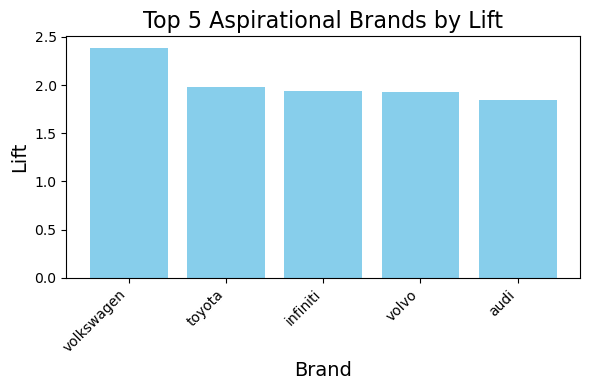

In [500]:
### Create a bar plot to show similar lift values
plt.figure(figsize=(6, 4))  # Set the figure size
plt.bar(top_5_aspirational.index, top_5_aspirational['aspirational'], color='skyblue')

plt.title('Top 5 Aspirational Brands by Lift', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Lift', fontsize=14)

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels if necessary
plt.tight_layout()  # Adjust layout for better fit
plt.show()


### Analysis, Implications, and Advice

To calculate the lift values, we specified several two-word phrases that people commonly use to express a desire to buy from a brand, such as "dream car," "want to," and "interested in." We then grouped these phrases under a single term, 'aspirational,' and analyzed which brands were most frequently mentioned alongside this sentiment. According to this analysis, Volkswagen, Toyota, Infiniti, Volvo, and Audi are currently the most respected and desired brands in the entry-level luxury car market. While Volkswagen holds the top spot, the difference in desirability between these five brands is not very large, meaning the competition is tight. Volkswagen is ahead, but only slightly, so it needs to keep working to maintain its lead. Since Audi and Infiniti are close behind, these brands must focus on setting themselves apart to avoid competing for the same customers. Differentiation will be key for all these brands to continue growing and standing out in this competitive market.

Toyota, on the other hand, holds a strong position among Japanese brands, with a higher aspirational lift than both Nissan and Honda. It's already the most wanted Japanese brand in the entry-level luxury segment, but it can't afford to slow down. Toyota should work to increase the gap between itself and its competitors by highlighting what makes it unique and desirable. While it’s ahead for now, Nissan and Honda aren't far behind, so staying proactive will help Toyota keep its edge.

Volkswagen, Audi, Infiniti, and Volvo need to focus on developing distinct identities that make them stand out from one another. These brands are closely matched in the eyes of consumers, so focusing on what makes each of them special is importaThis is especially true for Volkswagon and Audi which consumers view as extremely similar brands based on the lift values calculated in part B. nt. Whether it’s through unique features, a stronger brand experience, or exclusive perks, finding ways to differentiate will help them avoid competing directly for the same group of buye
Some key areas that these brands should prioritize for improvement include performance, price, luxury, handling, and power (identified in part F). These features are frequently discussed on Edmunds’ entry-level luxury forum, revealing their importance to buyers in this market. By focusing on what consumers truly care about, these brands can optimize their R&D and marketing budgets to get the best results for their expenditures. Selecting areas to improve that differ from their competitors can also help them differentiate themselves and attract buyers who may have initially considered other brands. Additionally, addressing areas where they may be weaker can help retain customers who are considering switching due to those shortcomings. By continuing to enhance these attributes and integrating them into their marketing strategies, these brands can strengthen their position and encourage customer loyalty, ultimately leading to a stronger brand reputation and increased market share.